# Contents
    1. Visualizing the data
        1.1. Tweets over time
        1.2. Tweets over locations
        1.3. Verified accounts and distribution
        1.4. Verified accounts and retweets

In [1]:
# the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [2]:
# reading in the required data
tweets = pd.read_csv("../../Data/tweetsCleaned.csv")
users = pd.read_csv("../../Data/users.csv", names = ["name", "handle", "language", "verified", "followers", 
                                                     "following", "statuses", "favourites"])
coordinates = pd.read_csv("../../Data/coordinates.csv")

# Visualizing the distribution of tweets over time

In [3]:
# creating new fields for hour and minute
tweets["created_at"] = pd.to_datetime(tweets["created_at"])

tweets["hour"] = tweets["created_at"].dt.hour
tweets["minute"] = tweets["created_at"].dt.minute

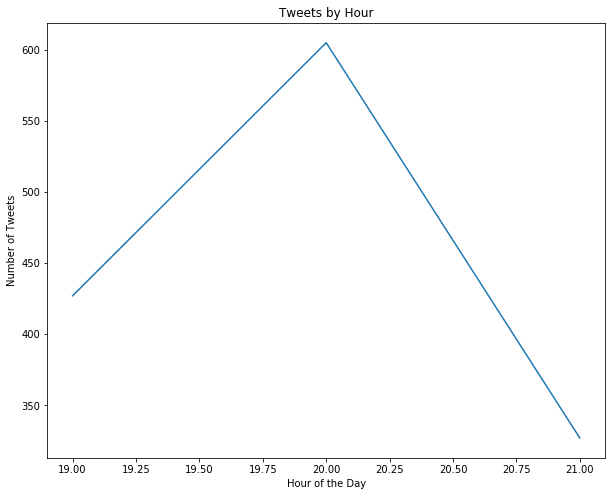

In [4]:
# tweets by hour
plt.figure(figsize = (10, 8))
plt.title("Tweets by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.plot(tweets.groupby("hour")["tweet_id"].count().index, tweets.groupby("hour")["tweet_id"].count())
plt.show()

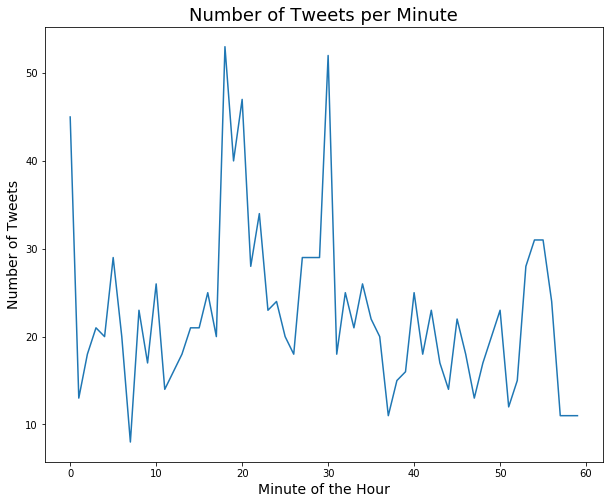

In [5]:
# tweets by minute
plt.figure(figsize = (10, 8))
plt.title("Number of Tweets per Minute", fontsize = 18)
plt.xlabel("Minute of the Hour", fontsize = 14)
plt.ylabel("Number of Tweets", fontsize = 14)
plt.plot(tweets.groupby("minute")["tweet_id"].count().index, tweets.groupby("minute")["tweet_id"].count())
plt.show()

This plot just looks nice. It doesn't offer us any information about what's actually going on. Well, for one, we can see that there are more tweets during the middle of an hour. But, the reason is more intruiguing. Maybe it will be of some use to look at the subject of the tweets that occured in that time.

For now, plotting the rates by hour might give us more information.

In [6]:
# creating a new group by object
time_g = tweets.groupby(["hour", "minute"])["tweet_id"].count().reset_index()

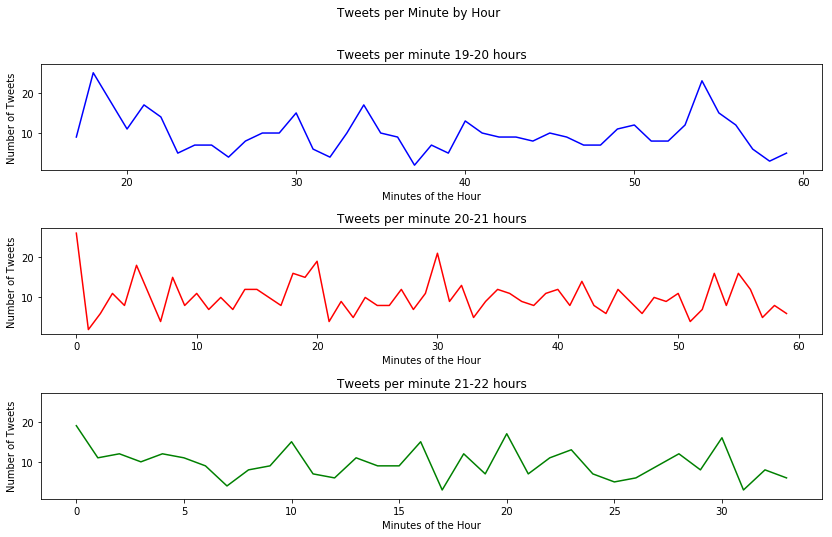

In [7]:
# tweet distributions by minute faceted by hour
fig = {"figsize": (14, 8)}
fig, ax = plt.subplots(3, 1, sharey = "all", sharex = "none", squeeze = False, **fig)
fig.suptitle("Tweets per Minute by Hour")
plt.subplots_adjust(hspace = 0.55)

for axr in ax.flat:
    axr.set_xlabel("Minutes of the Hour")
    axr.set_ylabel("Number of Tweets")
    
for axr, i, color in zip(ax.flat, [19, 20, 21], ["blue", "red", "green"]):
    axr.plot(time_g["minute"][time_g.hour == i], time_g["tweet_id"][time_g.hour == i], color = color)

# subplot 1
ax[0, 0].set_title("Tweets per minute 19-20 hours")

# subplot 2
ax[1, 0].set_title("Tweets per minute 20-21 hours")

# subplot 3
ax[2, 0].set_title("Tweets per minute 21-22 hours")



plt.show()

Again, this plot is not as effective as it is. But, it does do a good job of communicating how the number of tweets per minute changed in time period considered. Also, another thing to be noted is how the starts. We have the complete 60 minutes only for 20-21 hours. Interesting... Maybe a few more days of streaming the data would give more information... Gotta try that out.

However, the plot drawn above still doesn't shed light on the huge spike that occured near the middle of the hour. What could have caused that...?

Gotta look into the data more...

# Visualizing tweet distribution across locations
This is where the data in the coordinates file will come into play. First off, we can start by looking at the distribution of tweets.

A word of caution: There are some locations that have Nan's, but have their latitudes and longitudes filled out. These are all places in and around Afghanistan (particularly a place calld Rodhat in Afghanistan). These places were coded in Arabic in the raw data but were lost while converting to csv (My bad, I forgot to use the proper encoding...)

In [8]:
# getting a location groupby object
loc_g = coordinates.groupby(["latitude", "longitude"])["location"].count().reset_index()

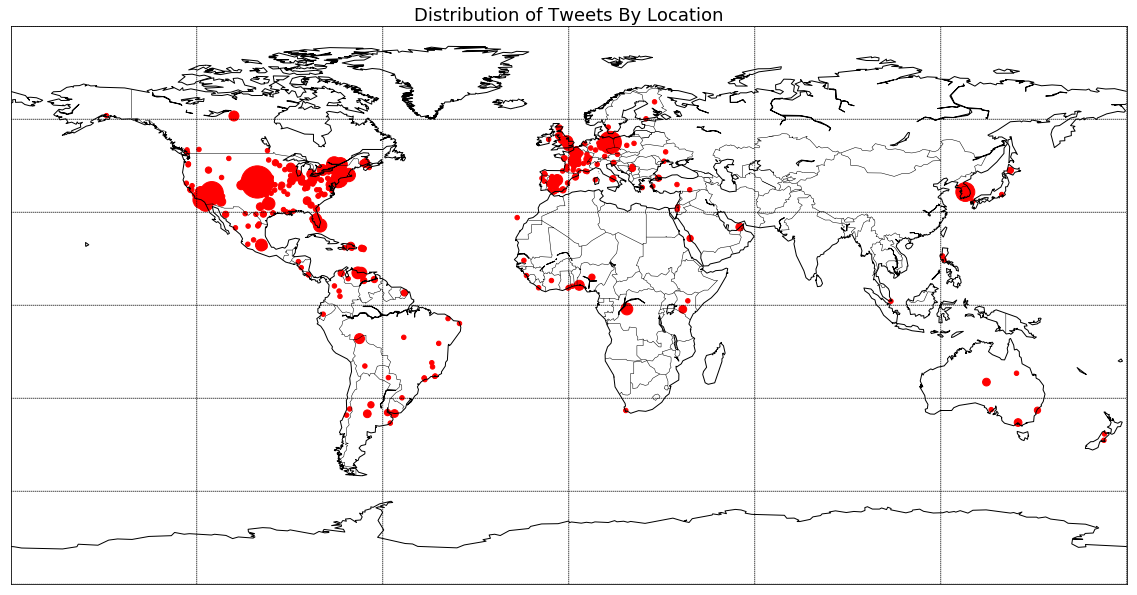

In [9]:
# getting the basic map layout set
fig = plt.figure(figsize = (20, 14))

m = Basemap(projection = 'cyl',llcrnrlat = -90, urcrnrlat = 90,\
            llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90., 91., 30.))
m.drawmeridians(np.arange(-180., 181., 60.))
m.drawcountries()

m.scatter(loc_g["longitude"], loc_g["latitude"], s = loc_g["location"] * 20,
          c = "Red")

plt.title("Distribution of Tweets By Location", fontsize = 18)
plt.show()

The plot shown above gives us some good information. For one, it shows that there were a lot of tweets that were sent out from USA and Europe. So, zooming into these particular spots might help us a little more. It might get us more information about where exactly these tweets were sent out from.

## Distribution of tweets in USA

In [10]:
# getting the coordinates of the locations in USA
usa_g = loc_g[(36 < loc_g["latitude"]) & (loc_g["latitude"] < 47) & (-119 < loc_g["longitude"]) & (loc_g["longitude"] < -4)].copy()

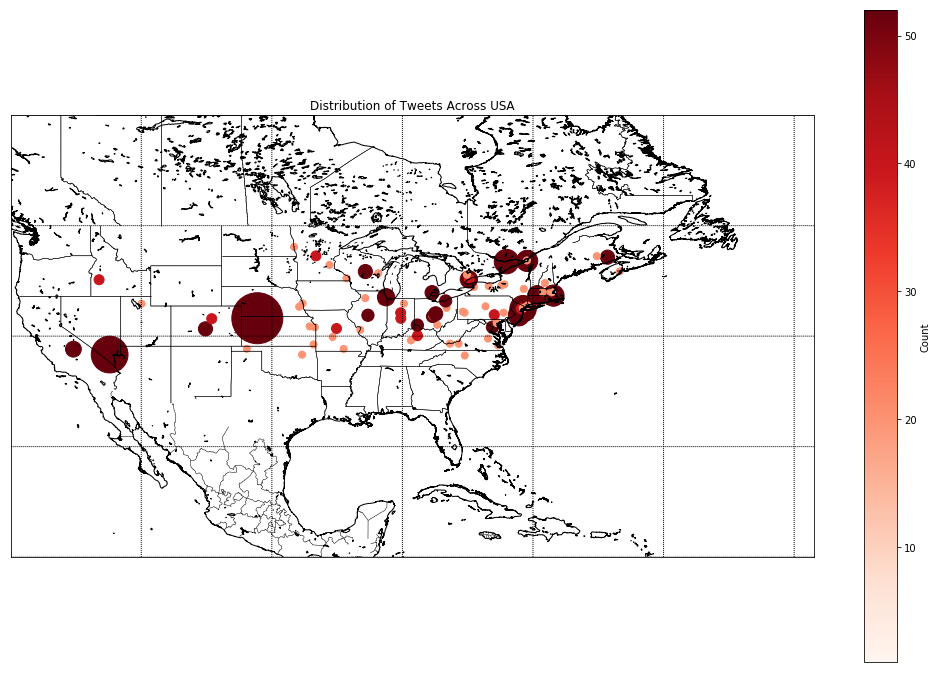

In [11]:
#### plotting the counts of tweets across USA
fig = plt.figure(figsize = (18, 12))

usaMap = Basemap(projection = "cyl", resolution = "h", llcrnrlat = 16, llcrnrlon = -125, 
           urcrnrlat = 60, urcrnrlon = -45)
usaMap.drawcoastlines()
usaMap.drawstates()
usaMap.drawmeridians(list(range(-125, 73, 13)))
usaMap.drawparallels(list(range(16, 71, 11)))

usaMap.scatter(usa_g["longitude"], usa_g["latitude"], s = usa_g["location"] * 50, c = usa_g["location"] * 20, 
              cmap = "Reds")

# the color bar
plt.colorbar(label = "Count")
plt.clim(usa_g["location"].min(), usa_g["location"].max())

plt.title("Distribution of Tweets Across USA")
plt.show()

On closer look, maybe these tweets have something to do with the NBA games that took place on New Year's Eve. There were about 6 games on New Year's Eve. On inspecting these hotspots, there's a pretty clear picture. These tweets are mainly concentrated in and around that city / state's region. 

On New Year's eve, there were games between the following:
    1. Orlando Magic (Florida) and Detroit Pistos (Michigan) at Amway Centre, Orlando.
    2. Toronto Raptors (Ontario, Canada) and Chicago Bulls (Illinois) at the Scotiabank Arena, Toronto.
    3. Miami Heat (Florida) and the Minnesota Timberwolves (Minnesota) at the American Airlines Arena, Miami.
    4. Dallas Mavericks (Texas) and Oklahoma City Thunder (Oklahoma) at the Aermican Airlines Centre, Dallas.
    5. The Portland Trail Blazers (Oregan) and the Philadelphia 76ers at the Moda Centre, Portland.
    6. The Los Angeles Lakers and the Sacramento Kings at the Staples Centre, Los Angeles.

If we look closely at the spots, the densities are concentrated in around those regions which represent states / cities of the away teams. This is interesting.

Since the location we have here is that of the user and not the actual tweet, we need to make some assumptions (based on the data of course). One assumption we can safely make is that these tweets were from those people who went to see their home team play. Or they were just tweeting from their homes. 

Whatever the case is, we'll need more data before we can validate this.

 # Visualizing distribution of Verified Accounts over the world

A verified account smells of credibility. It's an account that's been verified by Twitter HQ. To be eligible for it, one of the requirements is having 1K+ followers. So, which places contain the most verified accounts in the world? Where are these locations? 

This seems like an interesting question to ask.

To answer this question though, the data from the coordinates and the users datasets needs to combined. Then, only those locations with verified statuses have to be plotted. Let's get to it...!

However, the data for the users location is not in the users dataframe. It's in the tweets dataframe (kudos to the person who did that. And, that would be me...). So, first users and tweets have to be combined and then the coordinates have to added. 

In [12]:
# combining users and tweets and storing the result in an intermediary dataframe
intermediary = pd.merge(tweets[["handle", "location"]], users, left_on = "handle", right_on = "handle")

# combining coordinates and the intermediary dataframe
user_coords = pd.merge(intermediary, coordinates[["location", "latitude", "longitude"]], 
                       left_on = "location", right_on = "location")

# subsetting only verified users
verified_users = user_coords[user_coords.verified]

Now that the data's here, let the visualizations begin!!

In [13]:
# since rodhat is causing a problem for us, I'll filter out the data for the next visualization
verified_users = verified_users[~verified_users.location.isnull()]
# leaves us with 186 rows

In [14]:
# Creating a group by for getting verified user accounts by place
verified_g = verified_users.groupby(["latitude", "longitude"])["verified"].count().reset_index()

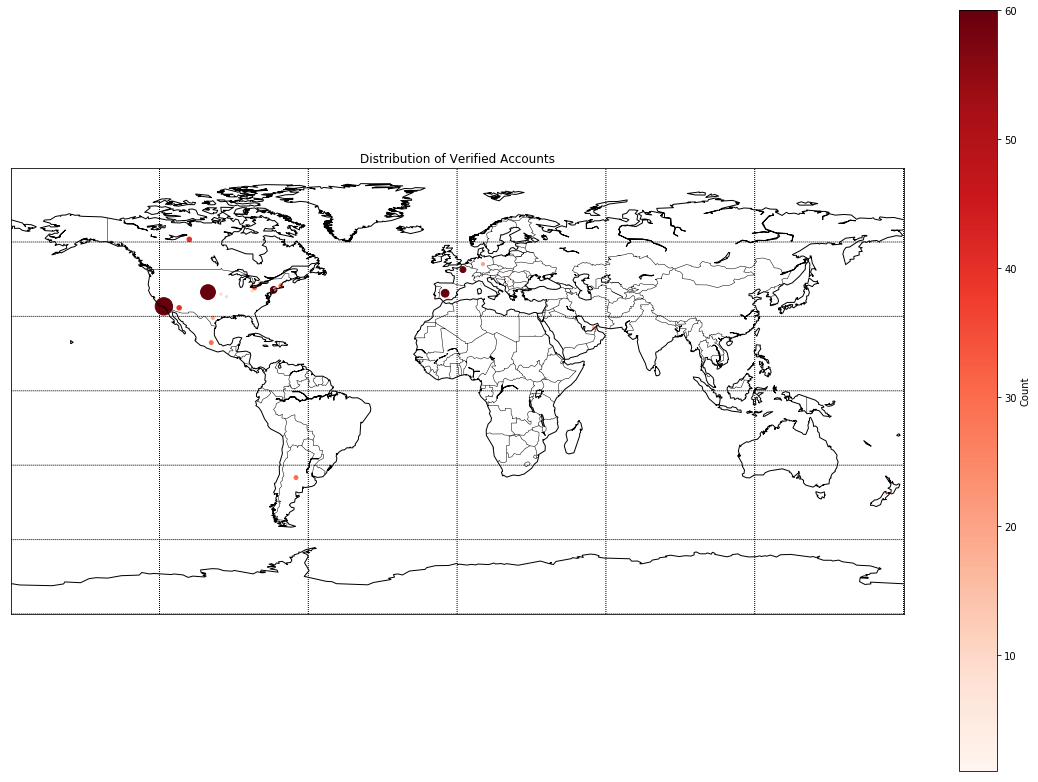

In [15]:
# plotting a map of the world again
fig = plt.figure(figsize = (20, 14))

m = Basemap(projection = 'cyl',llcrnrlat = -90, urcrnrlat = 90,\
            llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90., 91., 30.))
m.drawmeridians(np.arange(-180., 181., 60.))
m.drawcountries()

# plotting the points
m.scatter(verified_g["longitude"], verified_g["latitude"], s = verified_g["verified"] * 5, 
          c = verified_g["verified"] * 10, cmap = "Reds")

# adding a colour bar

plt.colorbar(label = "Count")
plt.clim(verified_g["verified"].min(), verified_g["verified"].max())

plt.title("Distribution of Verified Accounts")
plt.show()

Most of the verified accounts (in this dataset) seem to be concentrated in North America, esp. USA. This was sort of expected. But, there is a sampling bias here. I've probably collected the tweets at a time when there were a lot of people from teh USA tweeting. 

It might also be because of the search term. The NBA is one of the biggest sporting organizations on the planet and it is based out of the USA. So, there are probably going to be more people from USA tweeting than there are from other countries (not combined).

# The differences between...
Now, let's take a look at the differences in: the number of favourites and the number of statuses between verified and non-verified users.

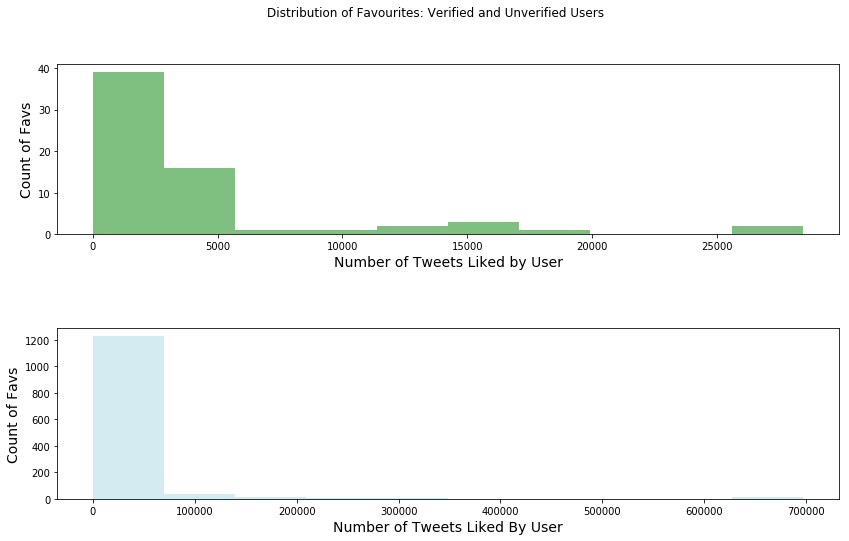

In [16]:
fig, axes = plt.subplots(2, 1, figsize = (14, 8))

fig.suptitle("Distribution of Favourites: Verified and Unverified Users")

plt.subplots_adjust(hspace = 0.55)
# distribution of favourites: verified and non-verified users
axes[0].hist(users["favourites"][users.verified], color = "green", alpha = 0.5)
axes[0].set_xlabel("Number of Tweets Liked by User", fontsize = 14)
axes[0].set_ylabel("Count of Favs", fontsize = 14)

axes[1].hist(users["favourites"][~users.verified], color = "lightblue", alpha = 0.5)
axes[1].set_xlabel("Number of Tweets Liked By User", fontsize = 14)
axes[1].set_ylabel("Count of Favs", fontsize = 14)
plt.show()

All we can see from these plots are that there are massive differences. But, just how much is it? Maybe some numbers and a boxplot will help...

In [17]:
users.groupby("verified")["favourites"].mean()

verified
False    16994.098145
True      3828.738462
Name: favourites, dtype: float64

On average, a verified user has liked about 4K tweets. An unverified user has like 4 times that!

Is it the same case for statuses too? How much do unverified users post relative to verified users?

In [18]:
# some numbers first
users.groupby("verified")["statuses"].mean()

verified
False    41801.824575
True     54369.061538
Name: statuses, dtype: float64

It's the reverse in this case. Verified users, on average post more than non verified users. Again, let's look at the distributions. But, this time, we'll use the normalized values instead of the absolute values.

In [19]:
normalized_statuses = users.favourites.apply(lambda x: (x - users.favourites.mean()) / users.favourites.std())

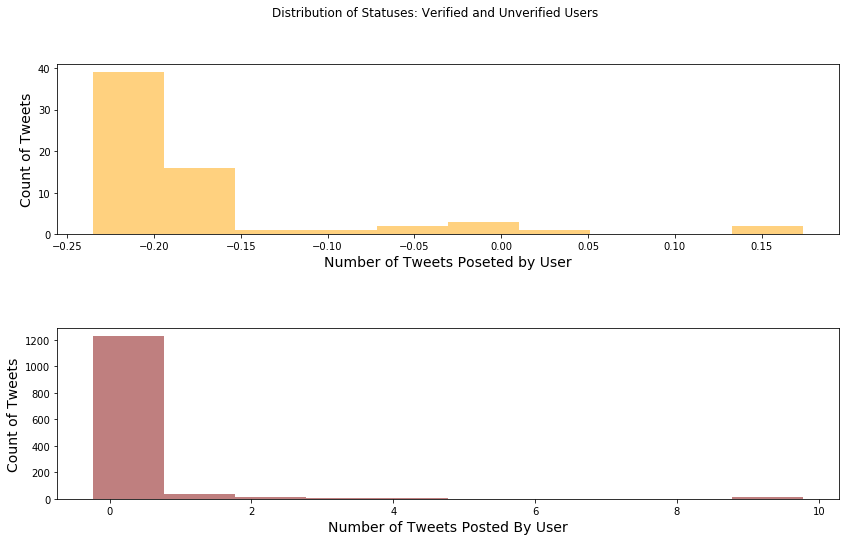

In [20]:
fig, axes = plt.subplots(2, 1, figsize = (14, 8))

fig.suptitle("Distribution of Statuses: Verified and Unverified Users")

plt.subplots_adjust(hspace = 0.55)
# distribution of favourites: verified and non-verified users
axes[0].hist(normalized_statuses[users.verified], color = "Orange", alpha = 0.5)
axes[0].set_xlabel("Number of Tweets Poseted by User", fontsize = 14)
axes[0].set_ylabel("Count of Tweets", fontsize = 14)

axes[1].hist(normalized_statuses[~users.verified], color = "maroon", alpha = 0.5)
axes[1].set_xlabel("Number of Tweets Posted By User", fontsize = 14)
axes[1].set_ylabel("Count of Tweets", fontsize = 14)
plt.show()

The two graphs above tell us that the distributions vary quite a bit. But, what exactly is happening. Maybe visualzing the users based on their differences will tell us more...

In [21]:
fav_status_ratio = users.favourites * users.statuses / (users.favourites + users.statuses)

What I'll do next is look at how the number of statuses a person posts varies with the number tweets they like. I'll facet this by verified and look at the differences in distributions.

In [22]:
users["fav_status_ratio"] = fav_status_ratio

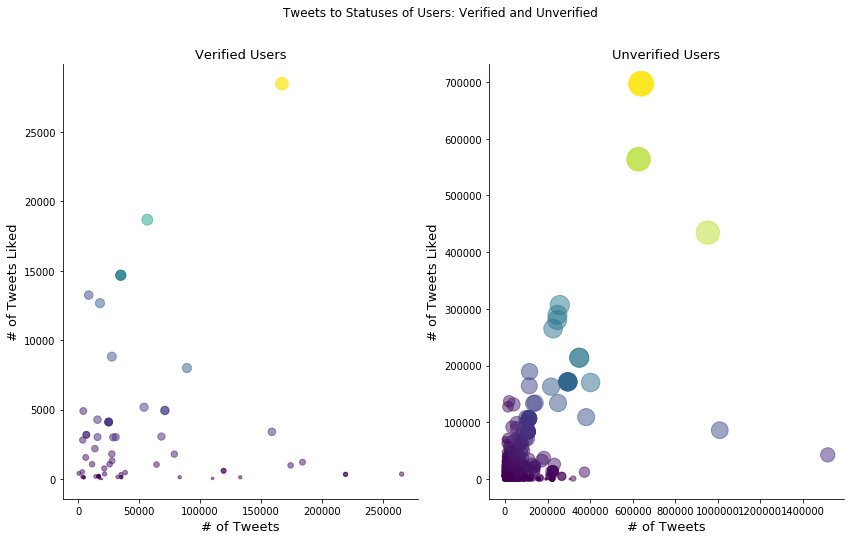

In [23]:
fig = {"figsize": (14, 8)}
fig, ax = plt.subplots(1, 2, **fig)
fig.suptitle("Tweets to Statuses of Users: Verified and Unverified")
plt.subplots_adjust(hspace = 0.55)

for axr in ax.flat:
    axr.set_xlabel("# of Tweets", fontsize = 13)
    axr.set_ylabel("# of Tweets Liked", fontsize = 13)
    
# subplot 1
ax[0].set_title("Verified Users", fontsize = 13)
ax[0].scatter(users["statuses"][users.verified], users["favourites"][users.verified], 
             c = users["fav_status_ratio"][users.verified], 
              s = users["fav_status_ratio"][users.verified] ** 0.5, alpha = 0.5)

# subplot 2
ax[1].set_title("Unverified Users", fontsize = 13)
ax[1].scatter(users["statuses"][~users.verified], users["favourites"][~users.verified], 
             c = users["fav_status_ratio"][~users.verified], 
             s = users["fav_status_ratio"][~users.verified] ** 0.5, alpha = 0.5)

# plt.colorbar(label = "Status to Favs Ratio")
sns.despine()

This is better. From this figure it's pretty clearly visible that verified users like and post in a more balanced way while unverified users like more than they post. That's the huge blob down there. There are outliers in both. 

Also, unverified users seem to not be active. There's a huge blob at the bottom that signifies this.